<div style="align: center;">
    <br>
    <img src="https://magnuminsurance.com/wp-content/uploads/2021/11/banner-auto-insurance.jpg" style="display:block; margin:auto; width:55%; height:210px;">
</div><br><br> 

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Car Damage Image Classification</strong></p>  
  
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.0; font-size:28px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Deep Learning Module<br>Car Damage Image Multi-Class Classification
      <br>EDA and <a href='https://pypi.org/project/keras-cv-attention-models'>"ConvNextV2"</a> Model Training<br>(Convolutional Neural Network (CNN))</p>    
</div>

- https://keras.io/api/applications/
- https://github.com/leondgarse/keras_cv_attention_models

## Introduction

In the insurance industry, processing claims for vehicle damage is a common task.<br>
With advancements in AI and Computer Vision, settling claims online by uploading damaged car images is now possible.

## Dataset

> https://www.kaggle.com/datasets/imnandini/analytics-vidya-ripik-ai-hackfest
>> Training set (`train.zip`)<br>
>> Test set (`test.zip`)<br>
>> Sample submission (`sample_submission.csv`)

### Training Dataset

The training set contains a diverse dataset of car images with labels indicating the specific type of damage (e.g., dents, scratches, cracks).<br>
The `train.csv` file includes the following columns:

- `image_id`: Unique identifier of the image<br>
- `filename`: Filename of the image<br>
- `label`: Type of damage present in the car<br>
  1. Crack
  2. Scratch
  3. Tire Flat
  4. Dent
  5. Glass Shatter
  6. Lamp Broken

### Test Dataset

The test set contains only images, and the goal is to predict the type of damage for each image.<br>
The `test.csv` file includes the following columns:

- `image_id`: Unique identifier of the image
- `filename`: Filename of the image

## Sample Submission

The solution file must contain predictions for every `image_id` in the test set. It must contain only 2 columns - `image_id` and `label`.<br>
The solution file format must be similar to that of `sample_submission.csv`. `sample_submission.csv` contains 2 variables:

- `image_id`: Unique identifier of an image
- `label`: Type of damage present in the car {1:crack, 2:scratch, 3:tire flat, 4:dent, 5:glass shatter, 6:lamp broken}

## Evaluation Metric

The model will be evaluated based on the macro F1 score.

## Table of Contents

1. Recognizing and Understanding Data
    - Reading train and test csv Files
    - Detailed EDA Check Images
    
    
2. Train Test Split


3. Build Dataset
    - Image Data Generator (Data augmentation)
    - flow_from_dataframe (with pandas dataframe)
    - flow_from_directory (with subdirectories)
    - Dataset Sanity Check
    - Dataset Benchmark Test
    - Optimize Performance
    - Explore Dataset Images
    
    
3. CNN (CONVOLUTIONAL NEURAL NETWORK) MODELING
    - Build CNN Model
    - Model Training
    - Model History
        - Save Model Weights
    - Model evaluation
        - BEST THRESHOLD calculate precision-recall curve
        - Predict Val Data
        - Predict Test Data 
        
        
4. Save Submission

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

<h4>pip freeze</h4>

## Dependencies

In [2]:
%%writefile requirements.txt
# Install packages, Most of exist on Kaggle env
# tensorflow[and-cuda]
tflite-runtime
keras-image-helper

matplotlib
ipywidgets
tqdm
pipenv
session_info

Overwriting requirements.txt


In [3]:
import os, sys, platform

!{sys.executable} -m pip install -r requirements.txt --no-cache-dir -Uq
print("Platform:", platform.system())  # platform.platform()
print("Python  :", platform.python_version())  # sys.version
print("Actv Env:", os.getenv('CONDA_DEFAULT_ENV', 'Not Found Conda Env'))

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.12.1 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.5 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.24.3 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.4 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
Platform: Linux
Python  : 3.10.12
Actv Env: Not Found Conda Env


## Pipenv for dependency management:

In [4]:
%%bash
get_versions() {
  for lib in "$@"; do
    echo "$lib==$(pip show $lib | grep Version | cut -d ' ' -f 2)"
  done
}
# Example usage
get_versions  "tflite-runtime" "keras-image-helper" "requests" "Pillow" "numpy" "pandas" "matplotlib" > requirements.txt
cat requirements.txt

tflite-runtime==2.14.0
keras-image-helper==0.0.1
requests==2.31.0
Pillow==10.1.0
numpy==1.24.3
pandas==2.0.3
matplotlib==3.8.2


In [5]:
# Generate Pipfile file from requirements.txt
!pipenv --python 3.10
# Create a virtual environment and install packages
!pipenv install
# Update the Pipfile.lock
!pipenv lock
# Clean up the temporary virtual environment
!pipenv --rm
# Check
# !ls ~/.local/share/virtualenvs/
!cat Pipfile

Creating a virtualenv for this project...
Pipfile: /kaggle/working/Pipfile
Using /opt/conda/bin/python3.1 (3.10.12) to create virtualenv...
⠴ Creating virtual environment.....created virtual environment CPython3.10.12.final.0-64 in 1524ms
  creator CPython3Posix(dest=/root/.local/share/virtualenvs/working-MLRu3Pvq, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==69.0.2, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator

✔ Successfully created virtual environment!
⠦ Creating virtual environment...
Virtualenv location: /root/.local/share/virtualenvs/working-MLRu3Pvq
requirements.txt found in /kaggle/working instead of Pipfile! Converting...
✔ Success! Importing requirements.....
⠇ Importing requirements...
did. 
We recommend updatin

## Print Available Devices - 'TPU', 'GPU', 'CPU'.

In [7]:
import os
# Disable TensorFlow warnings, before you import tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
print("Tensorflow version \t\t:", tf.__version__)

# Determines the number of threads used by independent non-blocking operations.
# Tensorflow set number of threads to 1 for speed up in parallell function mapping.
# 0 means the system picks an appropriate number.
tf.config.threading.set_inter_op_parallelism_threads(num_threads=1)
print("Number of threads \t\t:", tf.config.threading.get_inter_op_parallelism_threads())

print("Available devices:")
# tf.config.list_physical_devices('GPU')
for i, device in enumerate(tf.config.list_logical_devices()):
    print("%d) %s" % (i, device))

Tensorflow version 		: 2.13.0
Number of threads 		: 1
Available devices:
0) LogicalDevice(name='/device:CPU:0', device_type='CPU')
1) LogicalDevice(name='/device:GPU:0', device_type='GPU')


In [8]:
try:
    # If there's a GPU avaiable, to use the GPU, otherwise, using the CPU instead.
    gpus = tf.config.list_logical_devices('GPU')
    if len(gpus) > 1:
        strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
        print('Running on multiple GPUs ', gpus)
    elif len(gpus) == 1:
        # default strategy that works on CPU and single GPU
        strategy = tf.distribute.get_strategy()
        print('Running on single GPU ', gpus[0].name)
    else:
        # default strategy that works on CPU and single GPU
        strategy = tf.distribute.get_strategy()
        print('Running on CPU')
finally:
    print("Number of accelerators: ", strategy.num_replicas_in_sync)
    
# Enable Just-In-Time (JIT) computation graph at runtime, just before they are executed. 
# The idea is to convert the computation graph into machine code optimized for the specific hardware it will run on.
tf.config.optimizer.set_jit(True)
tf.config.optimizer.get_jit()

Running on single GPU  /device:GPU:0
Number of accelerators:  1


'autoclustering'

# Importing Related Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# !pip install scikit-plot -Uq
import scikitplot as skplt

import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor
from PIL import Image
import requests
import io

import re
import time
import shutil
import random
import datetime
import tempfile
import importlib
from glob import glob
from typing import cast
from pathlib import Path
from tqdm import tqdm
from multiprocessing import cpu_count
import pickle

import gc
gc.collect()

0

In [10]:
# !pip install session_info -Uq
import session_info
session_info.show(html=False)

-----
PIL                 9.5.0
keras_image_helper  0.0.1
matplotlib          3.7.4
numpy               1.24.3
pandas              2.1.4
requests            2.31.0
scikitplot          0.3.7
session_info        1.0.0
tensorflow          2.13.0
tflite_runtime      2.14.0
tqdm                4.66.1
-----
IPython             8.14.0
jupyter_client      7.4.9
jupyter_core        5.3.1
jupyterlab          4.0.9
notebook            6.5.5
-----
Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
Linux-5.15.133+-x86_64-with-glibc2.35
-----
Session information updated at 2023-12-20 15:52


**WARNING**: To prevent fragmentation and other memory errors, batch size has been adjusted based on Kaggle GPU memory 15 GB.

I would not recommend attempting to run this project without a GPU enabled tensorflow build as it will take hours or days to run. 

However, TPU can also be used (TPUs can be ~100x faster than CPUs and ~3.5x faster than GPUs).

In [38]:
DATA_DIR = '/kaggle/input/analytics-vidya-ripik-ai-hackfest'
print('DATA_DIR :', DATA_DIR)

# Set epochs
N_EPOCHS = 3
# Set the initial learning rate and weight decay, lr=0.001, wd=0.004
LEARNING_RATE = 1e-3 * strategy.num_replicas_in_sync
print('LEARNING_RATE:', '{:.1e}'.format(LEARNING_RATE))

# Reduce BATCH_SIZE or model complexity: If you are encountering ERRORS
BATCH_SIZE = 8 * strategy.num_replicas_in_sync # Gobal batch size.
# The global batch size will be automatically sharded across all
# replicas by the tf.data.Dataset API. A single TPU has 8 cores.
# The best practice is to scale the batch size by the number of
# replicas (cores). The learning rate should be increased as well.
print('BATCH_SIZE   :', BATCH_SIZE)

# Is Interactive Flag and COrresponding Verbosity Method
IS_INTERACTIVE = os.environ['KAGGLE_KERNEL_RUN_TYPE'] == 'Interactive'
VERBOSE = 1 if IS_INTERACTIVE else 0

DATA_DIR : /kaggle/input/analytics-vidya-ripik-ai-hackfest
LEARNING_RATE: 1.0e-03
BATCH_SIZE   : 8


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

## Read csv files

In [10]:
df_train = pd.read_csv(f'{DATA_DIR}/train/train/train.csv')
df_test  = pd.read_csv(f'{DATA_DIR}/test/test/test.csv')

df_train.shape, df_test.shape

((7200, 3), (4800, 2))

In [11]:
display(df_train, df_test)

image_id  filename  label
0            1     1.jpg      2
1            2     2.jpg      4
2            3     3.jpg      2
3            4     4.jpg      3
4            5     5.jpg      5
...        ...       ...    ...
7195      7196  7196.jpg      4
7196      7197  7197.jpg      4
7197      7198  7198.jpg      4
7198      7199  7199.jpg      2
7199      7200  7200.jpg      2

[7200 rows x 3 columns]

image_id   filename
0         7201   7201.jpg
1         7202   7202.jpg
2         7203   7203.jpg
3         7204   7204.jpg
4         7205   7205.jpg
...        ...        ...
4795     11996  11996.jpg
4796     11997  11997.jpg
4797     11998  11998.jpg
4798     11999  11999.jpg
4799     12000  12000.jpg

[4800 rows x 2 columns]

In [12]:
display(df_train.info(), df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  7200 non-null   int64 
 1   filename  7200 non-null   object
 2   label     7200 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 168.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  4800 non-null   int64 
 1   filename  4800 non-null   object
dtypes: int64(1), object(1)
memory usage: 75.1+ KB


None

None

## Check class distrubituon, If not enough, eliminate

In [13]:
label_to_cls={1:"crack",
              2:"scratch",
              3:"tire flat",
              4:"dent",
              5:"glass shatter",
              6:"lamp broken"}

cls_to_label={"crack":1,
              "scratch":2,
              "tire flat":3,
              "dent":4,
              "glass shatter":5,
              "lamp broken":6}

df_train.label.unique()

array([2, 4, 3, 5, 6, 1])

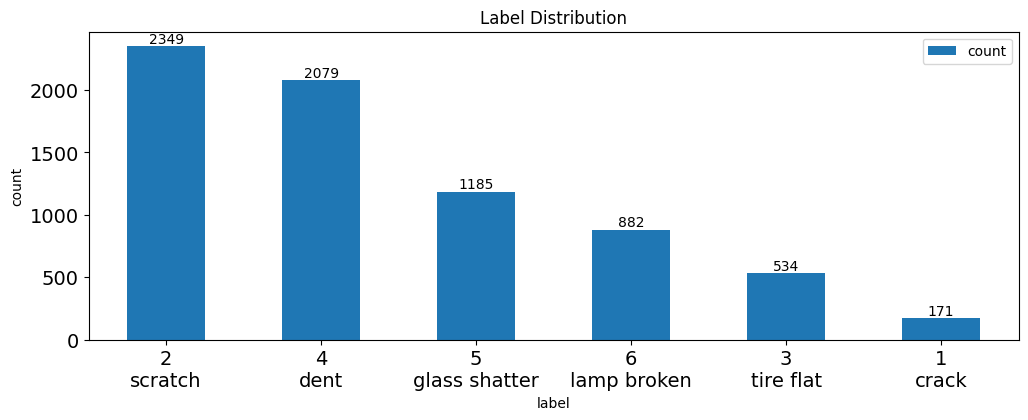

In [14]:
# Train data is imbalanced
df_train['label'].map({k:f'{k}\n{v}' for k,v in label_to_cls.items()}).value_counts().plot(
    kind='bar', title='Label Distribution', ylabel='count', legend=True,
    fontsize=14, rot=0, 
    figsize=(12, 4),    
)
plt.bar_label(plt.gca().containers[0])
plt.show()

**Note**: For the multi-class classification task we can choose **"scratch", "dent", "glass shatter"**.

## Random sampling for quality checks

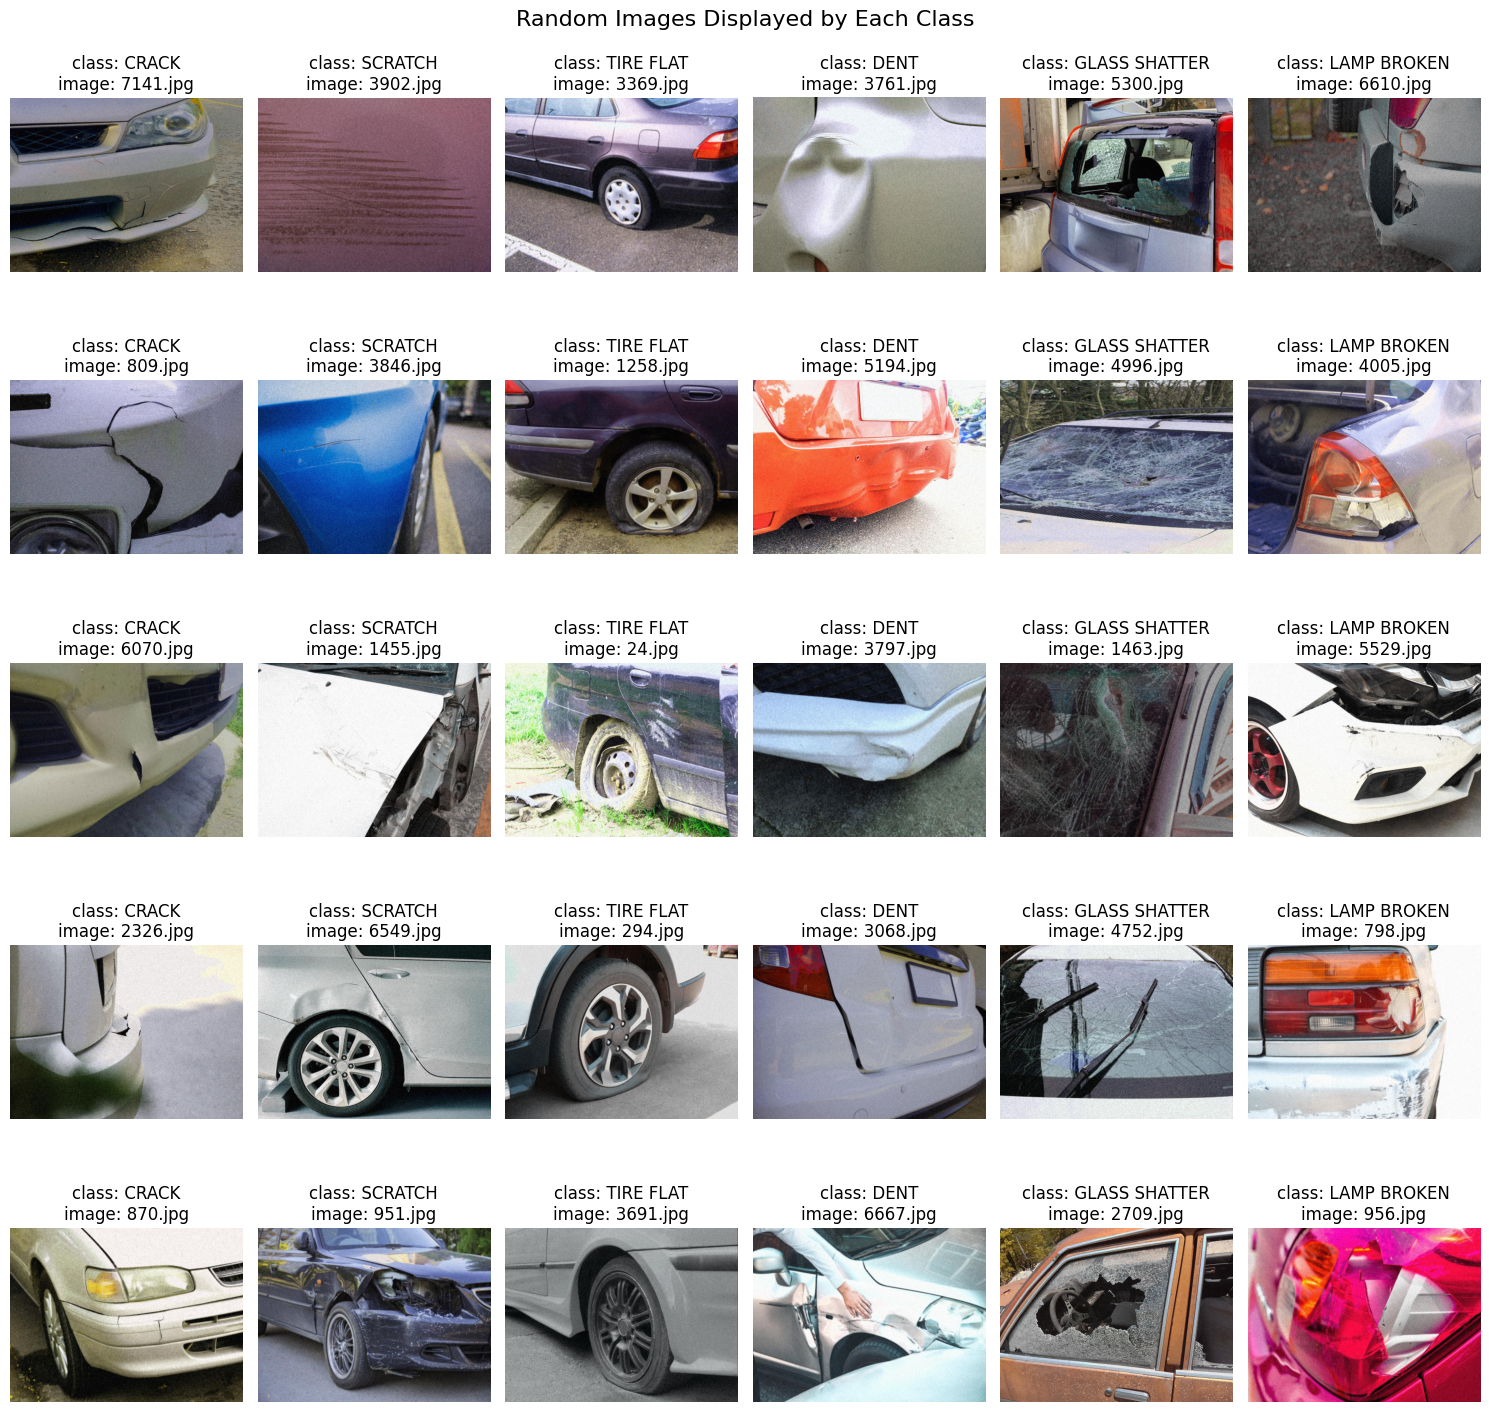

In [15]:
# Function to display random images from an each class
def display_random_images(num_images=1):    
    df = df_train.groupby('label').sample(num_images).sort_values(by='label')
    num_class = df.label.unique().size
    
    # Display the sampled images
    fig, ax = plt.subplots(nrows=num_images, ncols=num_class, figsize=(15,15))
    for g, group in df.groupby('label'):
        for idx, (_, row) in enumerate(group.iterrows()):
            filename = row["filename"]
            label = row["label"]
            label_class = label_to_cls[label]
                        
            image_dir  = f"{DATA_DIR}/train/train/images"
            image_path = os.path.sep.join([image_dir, filename])
            image_data = tf.keras.preprocessing.image.load_img(image_path)
            
            ax[idx, label-1].imshow(image_data)  # Switched indices
            ax[idx, label-1].set_title(f'class: {label_class.upper()}\nimage: {filename}')
            ax[idx, label-1].axis('off')
    plt.suptitle('Random Images Displayed by Each Class', fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
display_random_images(5)

## Image size distribution

In [16]:
for g, group in df_train.groupby('label'):
    sizes = []
    for idx, (_, row) in enumerate(group.iterrows()):
        filename = row["filename"]
        label = row["label"]
        label_class = label_to_cls[label]

        image_dir = f"{DATA_DIR}/train/train/images"
        image_path = os.path.sep.join([image_dir, filename])
        image_data = tf.keras.preprocessing.image.load_img(image_path)
        sizes.append(image_data.size)
    
    df = pd.DataFrame(sizes, columns=['width', 'height'])
    df['quantile'] = pd.qcut(df.mean(axis=1), q=5, labels=False)
    df['count']    = df.groupby('quantile')['quantile'].transform('count')
    average_by_quantile = df.groupby('quantile').mean().astype(int)
    
    # Print size and count information for each class
    print(f'Class: {label_class}')
    print(f'{"Avg Size":<15}\t{"Quantile Count":<15}')
    print('-' * 30)
    for quantile, row in average_by_quantile.iterrows():
        print(f"{row['width']}x{row['height']:<15}\t{row['count']:<15}", end='\n\n')

Class: crack
Avg Size       	Quantile Count 
------------------------------
826x619            	37             

871x653            	35             

1058x793            	31             

1249x937            	34             

1433x1074           	34             

Class: scratch
Avg Size       	Quantile Count 
------------------------------
819x614            	471            

862x646            	474            

1026x769            	466            

1265x948            	470            

1418x1063           	468            

Class: tire flat
Avg Size       	Quantile Count 
------------------------------
821x615            	111            

863x647            	105            

1040x779            	104            

1280x959            	107            

1433x1074           	107            

Class: dent
Avg Size       	Quantile Count 
------------------------------
819x614            	425            

861x645            	411            

1023x767            	411            

1255x941       

Note:

- Average Size can be select: **1024x768**

- Minimum Size can be select: **800x600**

For fast processing can be use **512x512**. But this will negatively affect the scores.

min-max: 0 255
shape  : (800, 600, 3)


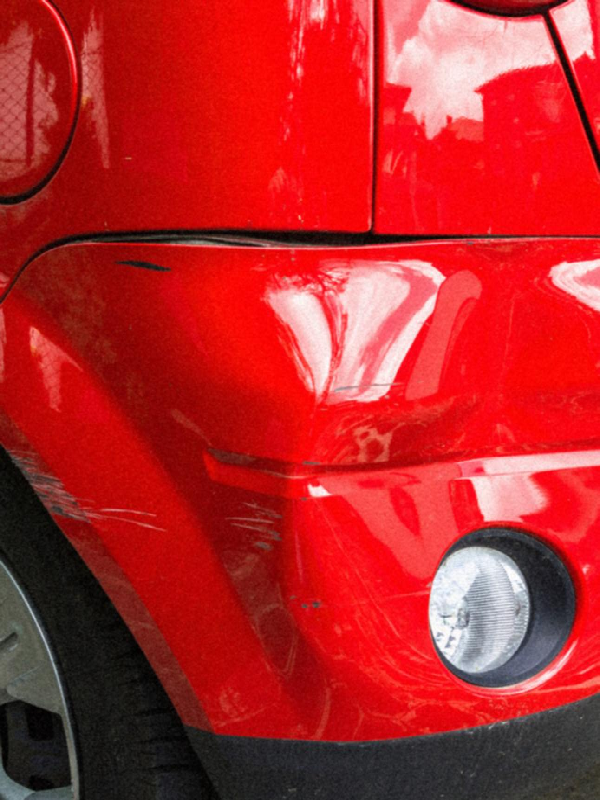

In [86]:
# Config
TARGET_HEIGHT, TARGET_WIDTH, N_CHANNELS = ( 800, 600, 3 )
INPUT_SHAPE  = (TARGET_HEIGHT, TARGET_WIDTH, N_CHANNELS)

sample = tf.keras.preprocessing.image.load_img(
    "/kaggle/input/analytics-vidya-ripik-ai-hackfest/train/train/images/2.jpg", 
    target_size=INPUT_SHAPE
)
print("min-max:", np.array(sample).min(), np.array(sample).max())
print("shape  :", np.array(sample).shape)
sample

In [87]:
img_array = np.random.rand(BATCH_SIZE, *INPUT_SHAPE).astype(np.float32)
memory_size_mb = img_array.nbytes / (1024**2)
print(f"Memory size of the batch: {memory_size_mb:.2f} MB")

Memory size of the batch: 43.95 MB


# Train Test Split

In [88]:
class_counts = df_train['label'].value_counts().reset_index()
# Filter classes with counts below 1000
filtered_classes = class_counts[class_counts['count'] > 1000]['label'].tolist()
# Filter the original DataFrame based on the selected classes
filtered_df = df_train[df_train['label'].isin(filtered_classes)]
filtered_df.label.unique()

array([2, 4, 5])

In [95]:
# prepare DataFrame
df = df_train.copy()
df = df.assign(label=df.label.map(label_to_cls))
df.label.unique().tolist()

['scratch', 'dent', 'tire flat', 'glass shatter', 'lamp broken', 'crack']

In [96]:
from sklearn.model_selection import train_test_split
SEED = 42

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.25, stratify=df['label'], random_state=SEED)
train_df.shape, val_df.shape

((5400, 3), (1800, 3))

# Build Dataset

## Image Data Generator with Data augmentation

- Generate batches of tensor image data with real-time data augmentation.
- Image transformations:
    * Flip - Horizontal and Vertical
    * Rotation (note you may lose some of image)
    * Shifting - Heigh and Width (note you may lose some of image)
    * Shear ie pulling from corners
    * Zoom - X and Y axis or on both

In [97]:
# Define the ImageDataGenerator with augmentations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,    # Flip images horizontally
    vertical_flip=True,      # Flip images vertically
    rotation_range=5,        # Rotate images randomly up to 5 degrees
    zoom_range=0.3,          # Zoom in randomly up to 20%
    shear_range=0.05,        # Apply shear transformation
    width_shift_range=0.05,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.05, # Shift images vertically by up to 10% of the height
    fill_mode='nearest',     # Fill in missing pixels using the nearest available pixel
    preprocessing_function=None,
    # validation_split=0.2,
)
val_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

## flow_from_dataframe

- Takes the dataframe and the path to a directory + generates batches.

- The generated batches contain augmented/normalized data.

In [98]:
# Image with Augmentation
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory='/kaggle/input/analytics-vidya-ripik-ai-hackfest/train/train/images',
    x_col='filename',
    y_col='label',
    class_mode='categorical',  # Set to 'categorical' for multi-class classification
    target_size=INPUT_SHAPE[:-1],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    shuffle=True,  # Set to True if you want to shuffle the order of the images
)
# Image
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory='/kaggle/input/analytics-vidya-ripik-ai-hackfest/train/train/images',
    x_col='filename',
    y_col='label',
    class_mode='categorical',  # Set to 'categorical' for multi-class classification
    target_size=INPUT_SHAPE[:-1],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    shuffle=False,  # Set to True if you want to shuffle the order of the images
)
# Image
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    directory='/kaggle/input/analytics-vidya-ripik-ai-hackfest/test/test/images',
    x_col='filename',
    y_col=None,
    class_mode=None,  # Set to 'categorical' for multi-class classification
    target_size=INPUT_SHAPE[:-1],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    shuffle=False,  # Set to True if you want to shuffle the order of the images
)

Found 5400 validated image filenames belonging to 6 classes.
Found 1800 validated image filenames belonging to 6 classes.
Found 4800 validated image filenames.


## flow_from_directory

- Takes the path to a directory & generates batches of augmented data.

In [99]:
# clear /kaggle/working
!rm -rf "train" "val"

In [100]:
# Build train Folder for ImageDataGenerator.flow_from_directory
for idx, df in train_df.iterrows():
    img_dir     = f"{DATA_DIR}/train/train/images"
    filename    = df["filename"]
    label_class = df["label"]

    img_path = os.path.sep.join([img_dir, filename])
    dest_dir = os.path.sep.join(["train", label_class])
    dest_path= os.path.sep.join([dest_dir, filename])    
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy2(img_path, dest_path)
    
    
# Build val Folder for ImageDataGenerator.flow_from_directory  
for idx, df in val_df.iterrows():
    img_dir     = f"{DATA_DIR}/train/train/images"
    filename    = df["filename"]
    label_class = df["label"]

    img_path = os.path.sep.join([img_dir, filename])
    dest_dir = os.path.sep.join(["val", label_class])
    dest_path= os.path.sep.join([dest_dir, filename])    
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy2(img_path, dest_path)

In [101]:
train_generator2 = train_datagen.flow_from_directory(
    '/kaggle/working/train',
    class_mode='categorical',  # Set to 'categorical' for multi-class classification
    target_size=INPUT_SHAPE[:-1],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    shuffle=True,  # Set to True if you want to shuffle the order of the images
    seed=SEED,
    # subset="training",
)
val_generator2 = val_datagen.flow_from_directory(
    '/kaggle/working/val',
    class_mode='categorical',  # Set to 'categorical' for multi-class classification
    target_size=INPUT_SHAPE[:-1],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    shuffle=True,  # Set to True if you want to shuffle the order of the images
    seed=SEED,
)
test_generator2 = test_datagen.flow_from_directory(
    '/kaggle/input/analytics-vidya-ripik-ai-hackfest/test/test',
    class_mode=None,  # No class mode for the test set
    target_size=INPUT_SHAPE[:-1],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    shuffle=False,  # Do not shuffle the test set
    seed=SEED,
)

Found 5400 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.
Found 4800 images belonging to 1 classes.


In [102]:
train_generator.class_indices, train_generator2.class_indices

({'crack': 0,
  'dent': 1,
  'glass shatter': 2,
  'lamp broken': 3,
  'scratch': 4,
  'tire flat': 5},
 {'crack': 0,
  'dent': 1,
  'glass shatter': 2,
  'lamp broken': 3,
  'scratch': 4,
  'tire flat': 5})

## Dataset Sanity Check

In [103]:
# Sanity check, image and label statistics
X_batch, y_batch = next(iter(train_generator))

print(f'image shape  : {X_batch.shape}, image dtype: {X_batch.dtype}')
print(f'image min    : {X_batch.min():.2f}, max: {X_batch.max():.2f}')
print(f'y_batch shape: {y_batch.shape}, y_batch dtype: {y_batch.dtype}')

image shape  : (8, 800, 600, 3), image dtype: float32
image min    : 0.00, max: 1.00
y_batch shape: (8, 6), y_batch dtype: float32


## Dataset Benchmark Test

In [104]:
import time
def benchmark_dataset(data_generator, num_epochs=2, steps_per_epoch=5, batch_size=BATCH_SIZE):
    # Iterate over epochs
    for epoch_num in range(num_epochs):
        epoch_start_time = time.perf_counter()
        # Iterate over steps in the epoch
        for step_idx in range(steps_per_epoch + 1):
            try:
                inputs, labels = next(data_generator)
            except StopIteration:
                break
            # Print information for the first step of the first epoch
            if epoch_num == 0 and step_idx == 0:
                print(f'Image shape : {str(inputs.shape):<{len(str(inputs.shape))}}, dtype: {inputs.dtype}\n'
                      f'Labels shape: {str(labels.shape):<{len(str(inputs.shape))}}, dtype: {labels.dtype}\n')

        # Calculate and print epoch metrics
        epoch_duration     = time.perf_counter() - epoch_start_time
        mean_step_duration = round(epoch_duration / steps_per_epoch * 1000, 1)
        images_per_second  = int(1 / (mean_step_duration / 1000) * batch_size)
        print(f'Epoch {epoch_num} took: {round(epoch_duration, 2)} sec, '
              f'Mean step duration: {mean_step_duration}ms, '
              f'Images/s: {images_per_second}')

# Benchmark Dataset
benchmark_dataset(train_generator)

Image shape : (8, 800, 600, 3), dtype: float32
Labels shape: (8, 6)          , dtype: float32

Epoch 0 took: 4.78 sec, Mean step duration: 955.2ms, Images/s: 8
Epoch 1 took: 4.81 sec, Mean step duration: 962.1ms, Images/s: 8


In [105]:
# Benchmark Dataset
benchmark_dataset(train_generator2)

Image shape : (8, 800, 600, 3), dtype: float32
Labels shape: (8, 6)          , dtype: float32

Epoch 0 took: 4.61 sec, Mean step duration: 921.5ms, Images/s: 8
Epoch 1 took: 4.4 sec, Mean step duration: 879.8ms, Images/s: 9


## Optimize Performance

- Pass 
- it usuful for for tf.data.Dataset cache, prefect etc.

## Explore Dataset Images

y ratio:
	Class: 1, Count: 3
	Class: 2, Count: 1
	Class: 3, Count: 1
	Class: 4, Count: 1
	Class: 5, Count: 2


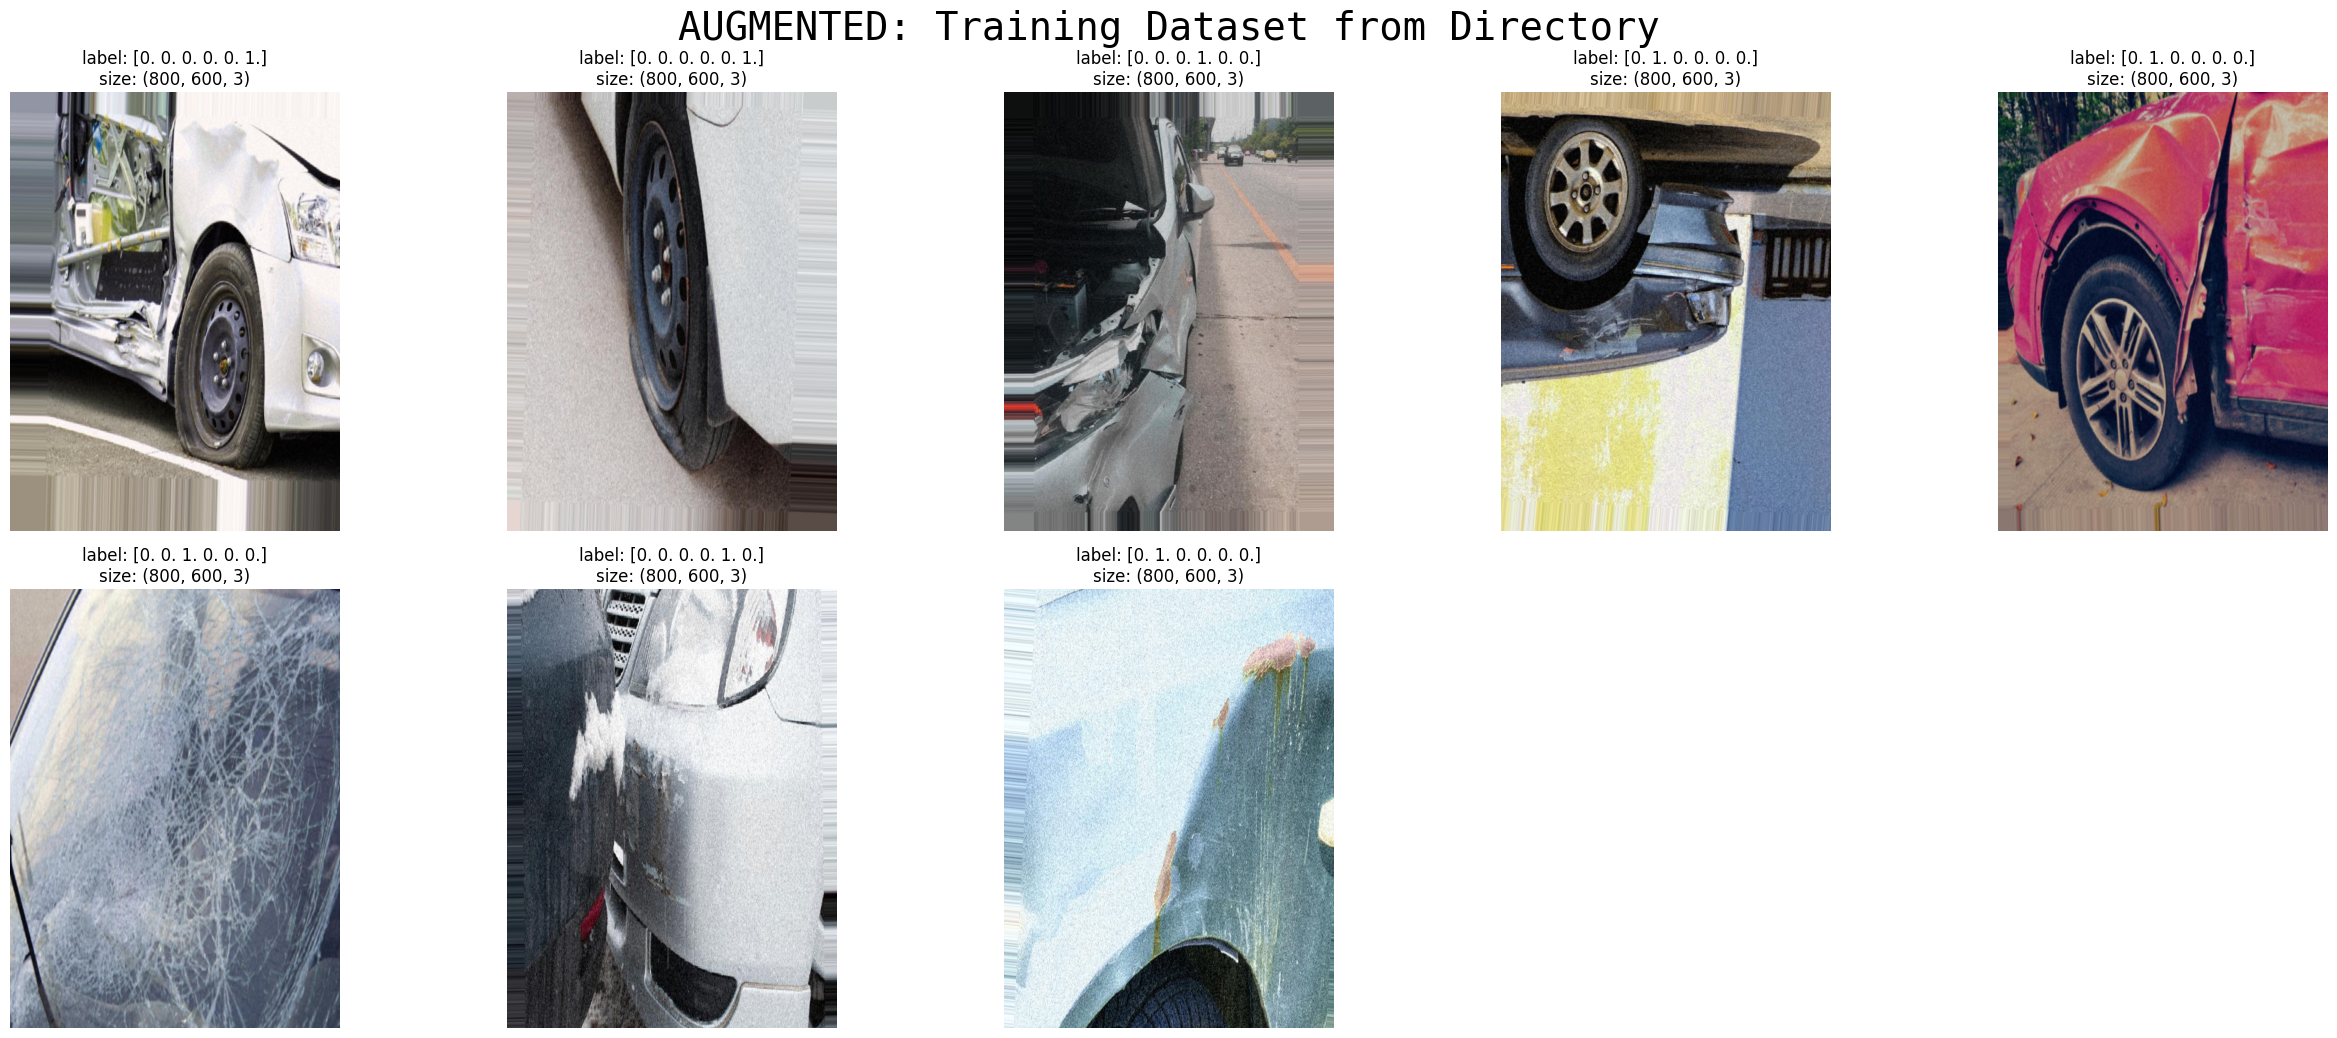

In [106]:
def show_batch(X_batch, y_batch=None, n_images=[5, 5], batch_size=BATCH_SIZE):    
    if y_batch is not None:
        print(f"y ratio:")
        # Use np.unique to get unique values and their counts
        values, counts = np.unique(np.argmax(y_batch, axis=1), return_counts=True)
        for value, count in zip(values.astype(np.uint8), counts):
            print(f"\tClass: {value}, Count: {count}")
    
    fig, axes = plt.subplots(
        nrows=n_images[0], ncols=n_images[1], 
        figsize=(n_images[1]*5, n_images[0]*5))
    fig.subplots_adjust(hspace=0.1, wspace=0.01)

    for n, ax in enumerate(axes.flat):        
        # Explicitly remove overlapping axes  
        if n >= batch_size:   
            for i in range(batch_size, np.prod(n_images)):
                axes.flat[i].remove()
            break
        else:             
            ax.imshow(X_batch[n]) # binary, gray, bone
            ax.axis('off'); ax.set_title(f"test")
            if y_batch is not None:
                ax.set_title(f"label: {y_batch[n]}\n"
                             f"size: {X_batch[n].shape}")                
    fig.tight_layout()
    fig.show();
    
        
# Show Example Batch
X_batch, y_batch = next(iter(train_generator))
show_batch(X_batch, y_batch)
plt.suptitle("AUGMENTED: Training Dataset from Directory", y=1.01, fontsize=28, family='monospace');

# Model Building

## Evaluation Criteria

Submissions are evaluated using the [probabilistic F1 score](https://aclanthology.org/2020.eval4nlp-1.9.pdf) (pF1).<br>
This extension of the traditional F score accepts probabilities instead of binary classifications.<br>
You can find a Python implementation [here](https://www.kaggle.com/code/sohier/probabilistic-f-score).


> https://en.wikipedia.org/wiki/F-score
>> F1 = 2 * (precision * recall) / (precision + recall)<br>
>> F_beta = (1 + beta^2) * (precision * recall) / (beta^2 * precision + recall)<br>
>> F_beta = (1 + beta^2) * true_positive / ((1 + beta^2) * true_positive + beta^2 * false_negative + false_positive)<br>

```py
# https://www.kaggle.com/code/sohier/probabilistic-f-score
def pfbeta(labels, predictions, beta):
    y_true_count = 0
    ctp = 0  # Correctly predicted positives
    cfp = 0  # Incorrectly predicted positives

    for idx in range(len(labels)):
        # Ensure the prediction is between 0 and 1
        prediction = min(max(predictions[idx], 0), 1)

        # Count the true positives and false positives
        if labels[idx]:
            y_true_count += 1
            ctp += prediction
        else:
            cfp += prediction

    beta_squared = beta * beta
    c_precision = ctp / (ctp + cfp)  # Precision for the current threshold
    c_recall = ctp / y_true_count  # Recall for the current threshold

    # Calculate the F-beta score using the provided formula
    if c_precision > 0 and c_recall > 0:
        result = (1 + beta_squared) * (c_precision * c_recall) / (beta_squared * c_precision + c_recall)
        return result
    else:
        return 0
```

In [107]:
# Tensorflow custom metric is just a conventional class object
class pFbeta(tf.keras.metrics.Metric):
    def __init__(self, beta=1, name='pFbeta', **kwargs):
        # Initialize properties
        super(pFbeta, self).__init__(name=name, **kwargs)
        self.beta = beta
        self.tp = self.add_weight(name='true_positives', initializer=tf.zeros_initializer)
        self.fp = self.add_weight(name='false_positives', initializer=tf.zeros_initializer)
        # self.tn = self.add_weight(name='true_negatives', initializer=tf.zeros_initializer)
        # self.fn = self.add_weight(name='false_negatives', initializer=tf.zeros_initializer)
        # self.tp + self.fn = self.tc
        self.tc = self.add_weight(name='actual_positives', initializer=tf.zeros_initializer)

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Update state called on each batch with true and predicted labels
        self.tp.assign_add(tf.cast(tf.reduce_sum(y_pred[y_true == 1]), tf.float32))
        self.fp.assign_add(tf.cast(tf.reduce_sum(y_pred[y_true == 0]), tf.float32))
        # self.tn.assign_add(tf.cast(tf.reduce_sum(1 - y_pred[y_true == 0]), tf.float32))
        # self.fn.assign_add(tf.cast(tf.reduce_sum(1 - y_pred[y_true == 1]), tf.float32))
        self.tc.assign_add(tf.cast(tf.reduce_sum(y_true), tf.float32))

    def result(self):
        # Result function is called to obtain the result        
        if self.tc == 0 or (self.tp + self.fp) == 0:
            # (self.tp + self.fn == 0) or (self.tp + self.fp == 0)
            return 0.0
        else:
            precision = self.tp / (self.tp + self.fp)
            recall = self.tp / self.tc
            beta_squared = self.beta ** 2
            fbeta_numerator = (1 + beta_squared) * (precision * recall)
            fbeta_denominator = beta_squared * precision + recall
            return fbeta_numerator / fbeta_denominator

    def reset_state(self):
        # Reset state is called after each epoch to start fresh each epoch
        self.tp.assign(0)
        self.fp.assign(0)
        self.tc.assign(0)

## Base Model with Transfer Learning: Model 1

- Keras offers pretrained models at [keras.io](https://keras.io/api/applications/)

- I use the [EfficientNetV2B0](https://keras.io/api/applications/convnext) model due to its fairly high Top-1 Accuracy and does not require depth.

- EfficientNetV2 models expect their inputs to be float tensors of pixels with values in the [0, 255] range.

In [111]:
def model_builder(input_shape=INPUT_SHAPE, n_class=6):
    # Adding the InputLayer with the specified input_shape
    input_image = tf.keras.layers.Input(shape=input_shape, dtype=tf.float32, name='image')
    
    # Freeze the weights of Model, we train the model we don't want to change top layers are well trained.
    # base_model.trainable = False
    # Load Keras Model as basemodel (convolutional layers) ie the "bottom" in keras terms
    base_model_output = tf.keras.applications.EfficientNetV2B0(
        input_shape=input_shape,   # Specifying the expected input shape
        weights='imagenet',        # (pre-training on ImageNet-1k), or the path to the weights file to be loaded. Defaults to "imagenet"
        include_top=False,         # include the fully-connected layer at the top of the network
        # pooling='avg',           # means that global average pooling will be applied to the output of the last convolutional layer
    )(input_image, training=False) # Freeze the weights during this call, don't want to change top layers

    # Flatten layer, output of the model will be a 2D tensor. ( BxHxWxC to BxC )
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model_output)
    
    # Start of Fully Connected (Dense) Layers: These layers connect every neuron to every neuron in the previous and subsequent layers.
    x = tf.keras.layers.Dense(256, activation='selu')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)

    # End with output layer, n_class due to the number of classes
    output = tf.keras.layers.Dense(n_class, activation='softmax')(x)

    # Create the final model
    model = tf.keras.Model(inputs=input_image, outputs=output)
    # Compile the model with Adam optimizer and categorical crossentropy loss
    model.compile(
        # other optimizers https://keras.io/api/optimizers
        # Adam is currently the recommended starting point
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        # in the dense layers the model takes inputs, generates outputs and then there is a softmax aka activation applied
        # from_logits = False means we APPLY activation in output and get normalized Probability distribution [0..1]
        # from_logits = True means we DONT APPLY activation in output and get raw score aka aren't normalized Logits [-inf...+inf]
        # tf.keras.losses.CategoricalCrossentropy(from_logits=False)
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy', pFbeta(), 'Precision', 'Recall']
    )
    return model

In [112]:
tf.keras.backend.clear_session()
gc.collect()

with strategy.scope():  
    model = model_builder()
    model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 800, 600, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 25, 19, 1280)      5919312   
 nal)                                                            
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542  

In [113]:
# Training the model
history = model.fit(
    train_generator, validation_data=val_generator,
    epochs=N_EPOCHS, batch_size=BATCH_SIZE, verbose=1,
)

Epoch 1/3
675/675 [==============================] - 660s 899ms/step - loss: 31.5872 - categorical_accuracy: 0.3104 - pFbeta: 0.2244 - precision: 0.2294 - recall: 0.0231 - val_loss: 1.5624 - val_categorical_accuracy: 0.3261 - val_pFbeta: 0.2365 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/3
675/675 [==============================] - 592s 877ms/step - loss: 1.5636 - categorical_accuracy: 0.3172 - pFbeta: 0.2370 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5612 - val_categorical_accuracy: 0.3261 - val_pFbeta: 0.2389 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
675/675 [==============================] - 596s 882ms/step - loss: 1.5636 - categorical_accuracy: 0.3169 - pFbeta: 0.2379 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5613 - val_categorical_accuracy: 0.3261 - val_pFbeta: 0.2350 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


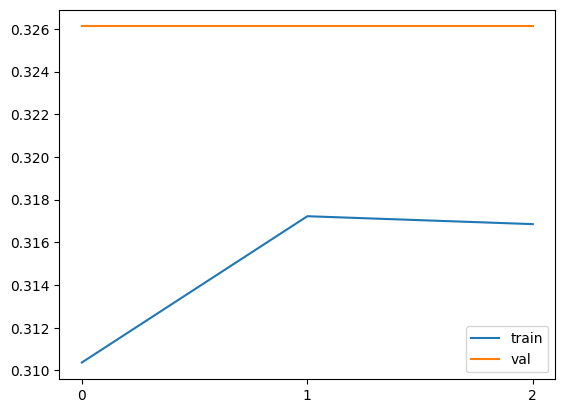

In [114]:
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='val')
plt.xticks(np.arange(3))
plt.legend();

## Tune Model: Model 2

- Change Learning Rate
- Adding more layers
    - Conv2D
    - AveragePooling2D
    - SpatialDropout2D
    - Dropout
    - BatchNormalization

Can be check KerasTuner API for more:
- BayesianOptimization Tuner

```py
import keras_tuner as kt
```

In [115]:
# class_weights = (train_df.label.value_counts().max() / train_df.label.value_counts()).rename(train_generator.class_indices).to_dict()
# class_weights

In [117]:
def model_builder(input_shape=INPUT_SHAPE, n_class=6):
    # Adding the InputLayer takes the input data (e.g., an image) with the specified input_shape
    input_image = tf.keras.layers.Input(shape=input_shape, dtype=tf.float32, name='image')
    
    # Load Keras Model as basemodel (convolutional layers) ie the "bottom" in keras terms
    base_model_output = tf.keras.applications.EfficientNetV2B0(
        input_shape=input_shape,   # Specifying the expected input shape
        weights='imagenet',        # (pre-training on ImageNet-1k), or the path to the weights file to be loaded. Defaults to "imagenet"
        include_top=False,         # include the fully-connected layer at the top of the network
        # pooling='avg',           # means that global average pooling will be applied to the output of the last convolutional layer
    )(input_image, training=False) # Freeze the weights during this call, don't want to change top layers
    
    # Convolutional layer capture hierarchical features
    x = tf.keras.layers.Conv2D(1024, (3, 3), strides=(2, 2), activation='selu')(base_model_output)
    # Add regularization techniques
    x = tf.keras.layers.BatchNormalization()(x)
    # Dropout to helps prevent overfitting by adding noise during training
    x = tf.keras.layers.SpatialDropout2D(0.3)(x)
    # Pooling to down-sample the spatial dimensions and reduce the number of parameters
    x = tf.keras.layers.AveragePooling2D((3, 3))(x)

    # Flatten layer flattens the data into a one-dimensional vector. ( BxHxWxC to Bx(HxWxC) )
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
    x = tf.keras.layers.Dense(128, activation='gelu')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)

    # End with output layer, 3 due to the number of classes
    output = tf.keras.layers.Dense(n_class, activation='softmax')(x)

    # Create the final model
    model = tf.keras.Model(inputs=input_image, outputs=output)

    # Compile the model with specified hyperparameters
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE / 33, weight_decay=LEARNING_RATE),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy', pFbeta(), 'Precision', 'Recall']
    )    
    return model

In [118]:
tf.keras.backend.clear_session()
gc.collect()

with strategy.scope():
    model2 = model_builder()
    model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 800, 600, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 25, 19, 1280)      5919312   
 nal)                                                            
                                                                 
 conv2d (Conv2D)             (None, 12, 9, 1024)       11797504  
                                                                 
 batch_normalization (Batch  (None, 12, 9, 1024)       4096      
 Normalization)                                                  
                                                                 
 spatial_dropout2d (Spatial  (None, 12, 9, 1024)       0         
 Dropout2D)                                                      
                                                             

In [119]:
# Training the model
history = model2.fit(
    train_generator, validation_data=val_generator,
    epochs=N_EPOCHS, batch_size=BATCH_SIZE, verbose=1,
)

Epoch 1/3
675/675 [==============================] - 669s 901ms/step - loss: 1.6410 - categorical_accuracy: 0.3015 - pFbeta: 0.2322 - precision: 0.3855 - recall: 0.0365 - val_loss: 4.2073 - val_categorical_accuracy: 0.3261 - val_pFbeta: 0.3144 - val_precision: 0.3261 - val_recall: 0.3261
Epoch 2/3
675/675 [==============================] - 604s 895ms/step - loss: 1.4979 - categorical_accuracy: 0.3557 - pFbeta: 0.2771 - precision: 0.4876 - recall: 0.1022 - val_loss: 3.7291 - val_categorical_accuracy: 0.2889 - val_pFbeta: 0.2931 - val_precision: 0.2902 - val_recall: 0.2889
Epoch 3/3
675/675 [==============================] - 598s 886ms/step - loss: 1.3841 - categorical_accuracy: 0.3993 - pFbeta: 0.3193 - precision: 0.5266 - recall: 0.1667 - val_loss: 1.5634 - val_categorical_accuracy: 0.3800 - val_pFbeta: 0.2988 - val_precision: 0.4104 - val_recall: 0.1400


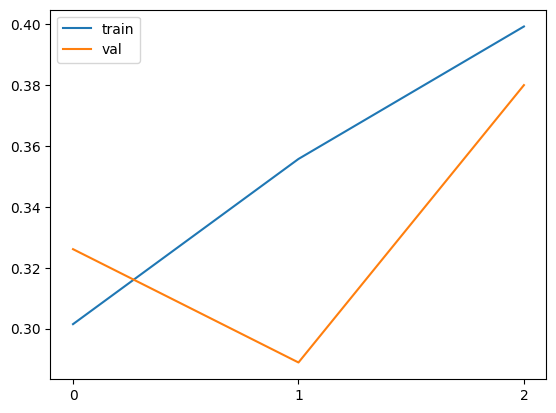

In [120]:
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='val')
plt.xticks(np.arange(3))
plt.legend();

## Save Model and Weights

- High-level (Keras): [Model.save](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save) and [tf.keras.models.load_model](https://www.tensorflow.org/api_docs/python/tf/keras/saving/load_model) (.keras zip archive format)
- Low-level: [tf.saved_model.save](https://www.tensorflow.org/api_docs/python/tf/saved_model/save) and [tf.saved_model.load](https://www.tensorflow.org/api_docs/python/tf/saved_model/load) (TF SavedModel format)

In [121]:
# Save model, Path where to save the model. (Keras V3 ends in .keras)
# tf.keras.models.load_model('car_tfmodel_v213.h5')
model2.save('car_tfmodel_v213.keras')

# Weights can be saved, Path where to save the model. (Keras V3 ends in .weights.h5)
# model.load_weights('car_tfmodel_v213.weights.h5')
model2.save_weights('car_tfmodel_v213.weights.h5')

In [125]:
# Save model, Path where to save the model. (Keras legacy ends in .h5)
# tf.keras.models.load_model('car_tfmodel_legacy.h5')
model2.save('car_tfmodel_legacy.h5', save_format='h5')

# Weights can be saved, Path where to save the model. (Keras legacy ends in .h5)
# Model.load_weights('breast_cancer_tfmodel_legacy_weights.h5')
model2.save_weights('car_tfmodel_legacy_weights.h5')

## Testing model and Prepare for Containerization

In [130]:
tf.keras.backend.clear_session()
gc.collect()
with strategy.scope():
    # Load the model (architecture + weights)
    model = tf.keras.models.load_model('car_tfmodel_v213.keras', compile=False)
    # Set the entire model to be non-trainable
    model.trainable = False
    model.compile(metrics=['Precision', 'Recall'])
    # Validation metric on initialized model
    _ = model.evaluate(val_generator, return_dict=True, verbose=1)

225/225 [==============================] - 41s 155ms/step - loss: 0.0000e+00 - precision: 0.4104 - recall: 0.1400


# Convert Keras to TF-Lite

In [28]:
tf.keras.backend.clear_session()
# Load the model (architecture + weights)
model = tf.keras.models.load_model('car_tfmodel_v213.keras', compile=False)
# Set the entire model to be non-trainable
model.trainable = False
model.compile()

# Converting a tf.Keras model to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('car_tfmodel_v214.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [14]:
#create inerpreter
interpreter = tflite.Interpreter(model_path='car_tfmodel_v214.tflite')
interpreter.allocate_tensors()
input_index  = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## Testing function for Lambda

image shape  : (1, 800, 600, 3), image dtype: float32
image min    : 0.00, max: 1.00


'dent'

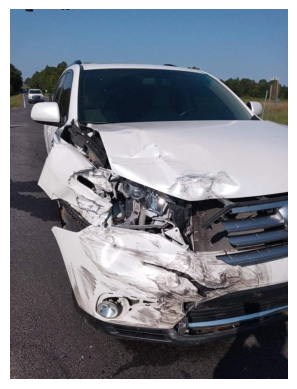

In [48]:
from PIL import Image
import numpy as np
import requests
import io

label_to_cls={1:"crack",
              2:"scratch",
              3:"tire flat",
              4:"dent",
              5:"glass shatter",
              6:"lamp broken"}

def load_and_preprocess_image(url, target_size=(600, 800), debug=False):
    # Fetch the image from the URL
    response = requests.get(url)
    
    # Open the image, resize, and convert to NumPy array
    img = Image.open(io.BytesIO(response.content)).resize(target_size)
    X = (np.expand_dims(np.array(img), 0) / 255).astype(np.float32)
    if debug:        
        print(f'image shape  : {X.shape}, image dtype: {X.dtype}')
        print(f'image min    : {X.min():.2f}, max: {X.max():.2f}')
        plt.imshow(img)
        plt.axis("Off")
    return X


# using random image
url = "https://www.toyotanation.com/attachments/received_252542826473517-jpeg.343498"
X = load_and_preprocess_image(url, debug=True)

interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
label_to_cls[np.argmax(preds)+1]

In [49]:
dict(zip(label_to_cls.items(), preds[0]))

{(1, 'crack'): 0.033649832,
 (2, 'scratch'): 0.2191843,
 (3, 'tire flat'): 0.08420673,
 (4, 'dent'): 0.40471497,
 (5, 'glass shatter'): 0.19545667,
 (6, 'lamp broken'): 0.062787585}

class with the highest probability:

* crack        : 3.36%
* scratch      : 21.92%
* tire flat    : 8.42%
* dent         : 40.47%
* glass shatter: 19.55%
* lamp broken  : 6.28%

In [50]:
# https://github.com/alexeygrigorev/keras-image-helper
from keras_image_helper import create_preprocessor
# Create preprocessor for xception,resnet50,vgg16,inception_v3, if Needed
preprocessor = create_preprocessor('xception', target_size=(600, 800))

# using random image
url = "https://www.toyotanation.com/attachments/received_252542826473517-jpeg.343498"
X = preprocessor.from_url(url)

interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

dict(zip(label_to_cls.items(), preds[0]))

{(1, 'crack'): 0.006185653,
 (2, 'scratch'): 0.34056956,
 (3, 'tire flat'): 0.02128057,
 (4, 'dent'): 0.5486963,
 (5, 'glass shatter'): 0.06743222,
 (6, 'lamp broken'): 0.015835693}

## Convert .ipynb to .py

Bash code for converting ipynb to py

```bash
jupyter nbconvert --to script model.ipynb
```

lambda function a function must be added as below to the lambda_function.py file:

```py
def lambda_handler(event, context):
    url = event['url']
    result = predict(url)
    return result
```

In [56]:
%%writefile lambda_function.py
#!/usr/bin/env python
# coding: utf-8

import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

interpreter = tflite.Interpreter(model_path='car_tfmodel_v214.tflite')
interpreter.allocate_tensors()
input_index  = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

classes = [
    'crack',
    'scratch',
    'tire_flat',
    'dent',
    'glass_shatter',
    'lamp_broken'
]

preprocessor = create_preprocessor('xception', target_size=(600, 800))

def predict(url):
    X = preprocessor.from_url(url)

    interpreter.set_tensor(input_index, X)
    interpreter.invoke()    
    preds = interpreter.get_tensor(output_index)
    
    float_predictions = preds[0].tolist()

    return dict(zip(classes, float_predictions))


def lambda_handler(event, context):
    url    = event['url']
    result = predict(url)
    return result

Overwriting lambda_function.py


## Testing function for Lambda

In [1]:
import lambda_function

# Create the event with the URL of the image
event = {'url': 'https://www.toyotanation.com/attachments/received_252542826473517-jpeg.343498'}

# Invoke the Lambda function locally
lambda_function.lambda_handler(event, None)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


{'crack': 0.006185653153806925,
 'scratch': 0.34056955575942993,
 'tire_flat': 0.021280569955706596,
 'dent': 0.5486962795257568,
 'glass_shatter': 0.0674322172999382,
 'lamp_broken': 0.01583569310605526}

# Preparing Docker Image

- https://repost.aws/knowledge-center/lambda-container-images

Build docker image using the recommended public image for Lambda once Dockerfile has been created below:

```sh
docker build -t car-insurance-model .
```

To test first run image that was built:

```sh
docker run -it --rm -p 8080:8080 car-insurance-model:latest
```

In [2]:
%%writefile Dockerfile
# public image for Lambda
FROM public.ecr.aws/lambda/python:3.10

# Copy the Pipfile and Pipfile.lock into the container
# COPY ["requirements.txt", "./"]
# RUN pip install -r requirements.txt

# recompiled with the lambda image
RUN pip install -U https://github.com/alexeygrigorev/tflite-aws-lambda/raw/main/tflite/tflite_runtime-2.14.0-cp310-cp310-linux_x86_64.whl
RUN pip install keras-image-helper

# Copy function code and model into the container
COPY ["lambda_function.py", "car_tfmodel_v214.tflite", "./"]

# Set the CMD to your handler 
CMD [ "lambda_function.lambda_handler" ]

Overwriting Dockerfile


In [3]:
# to local
# docker build -t car-insurance-model .
# docker run -it --rm -p 9000:8080 car-insurance-model:latest

## test.py created per AWS documentation for testing

Run the file:

```sh
python client_to_docker_test.py
```

This is the output I recieved which clearly shows that the image was predicted as a "dent" which is correct:

```sh
{'crack': 0.006185653153806925,
 'scratch': 0.34056955575942993,
 'tire_flat': 0.021280569955706596,
 'dent': 0.5486962795257568,
 'glass_shatter': 0.0674322172999382,
 'lamp_broken': 0.01583569310605526}
```

In [9]:
%%writefile client_to_docker_test.py
import requests

# curl -XPOST "http://localhost:9000/2015-03-31/functions/function/invocations" -d '{}'
url = 'http://localhost:9000/2015-03-31/functions/function/invocations'

# Create the event with the URL of the image
event = {'url': 'https://www.toyotanation.com/attachments/received_252542826473517-jpeg.343498'}

# Send POST request using requests module
response = requests.post(url, json=event)
# Print the response
print(response.text)

Overwriting client_to_docker_test.py


In [8]:
# to local
# python client_to_docker_test.py

# python client_to_docker_test.py
# {"crack": 0.006185653153806925, "scratch": 0.34056955575942993, "tire_flat": 0.021280569955706596, "dent": 0.5486962795257568, "glass_shatter": 0.0674322172999382, "lamp_broken": 0.01583569310605526}

# Docker Hub

In [7]:
# Tag the Existing Image, username/car-insurance-model:new-tag
# docker tag car-insurance-model:latest developerhost/car-insurance-model:latest

# Push the newly tagged image to Docker Hub:
# developerhost/car-insurance-model:latest

# you can pull the image:
# docker pull developerhost/car-insurance-model:latest

## End of Project